<h1>Weather Forecasting 

<h3>Life cycle of project

* Understanding the problem statement
* Data collection
* Data checks to perform
* EDA
* Data pre-processing
* Model-Training
* Hyperparameter Tuning
* Choose best model

<h4>1 Problem statement

* This project understands how the condition of weather is affected by other variables such as 
date,precipitation,temp_max,temp_min,wind

<h4>2. Data Collection

* dataset source: kaggle

<h4>2.1 Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
from scipy import stats
from scipy.stats import pearsonr,ttest_ind
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

<h1>Understanding the dataset

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
print(df.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


There are 6 variable corresponding to 6 columns in the dataset:
* 4 variables indicating weather condtion including: precipitation,temp_max,temp_min,wind
* 1 variable to record date,
* 1 variable indicating weather condition : weather,
* Precipitation in weather refers to any form of water that falls from the sky. This    includes: rain,hail,snowfall or drizzle
* tem_max indicates highest temp of the day
* temp_min indicates lowest temp of the day
* wind stores wind speed
* weather defines weather of the day

In [7]:
df.shape

(1461, 6)

<h4>Rows and Columns

* Total 1461 Rows and 6 Columns

<h4>3. Data Checks to perform

* Check Missing value
* Check duplicated
* Check data type
* check the number of unique value of each column
* check the statistics of data set
* check various categories present in the different categorical column

<h4>3.1 Check Missing values

In [13]:
df. isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<h5>There are no missing values 

<h4>Check duplicates 

In [16]:
df.duplicated().sum()

0

<h4>3.3 Check data types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


<h4>3.4 Checking the number of unique values of each columns

In [20]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

<h4>3.5 Check statistics of dataset

In [24]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<h4> Insight</h4>

* from the above description of numerical data , the mean of precipitation and wind are almost equal

* Max temp = 35.6

* Min temp = 18.3

* Max wind = 9.5

* Min wind = 0.4

<h4>Exploring data</h4>

In [35]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [37]:
print("Categories in weather Variable :"  , end = " " )
print(df['weather'].unique())

Categories in weather Variable : ['drizzle' 'rain' 'sun' 'snow' 'fog']


In [39]:
#define numerical & categorical column
numeric_feature = [ feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [ feature for feature in df.columns if df[feature].dtype=='O']


print('we have {} numerical feature : {}'.format(len(numeric_feature),numeric_feature))
print('we have {} categorical feature : {}'.format(len(categorical_feature),categorical_feature))

we have 4 numerical feature : ['precipitation', 'temp_max', 'temp_min', 'wind']
we have 2 categorical feature : ['date', 'weather']



<h3> EDA         

<h4> 4.1.1 Histogram & KDE

<Axes: xlabel='weather', ylabel='Count'>

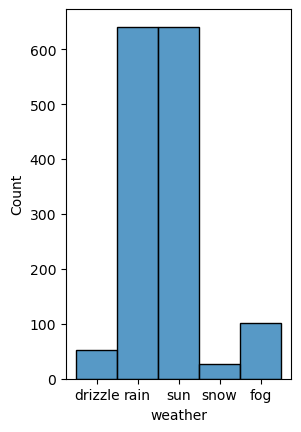

In [43]:
fig  = figsize=(12,5)
plt.subplot(1,2,1)
sns.histplot(data = df,x ='weather')

 <h4>Insight

* No of days for :
* drizzle = 40
* rain = 650
* sun = 650
* snow = 21
* fog = 100

 * there are maximum no days in which the weather is rain and sun

<Axes: xlabel='date', ylabel='temp_max'>

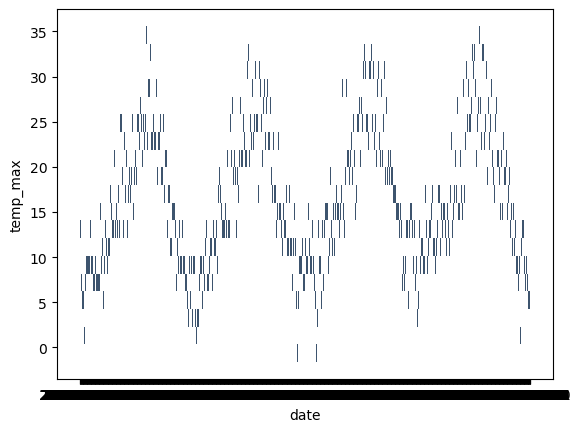

In [47]:
fig = figsize=(30,15)
sns.histplot(data = df ,x='date',y='temp_max')

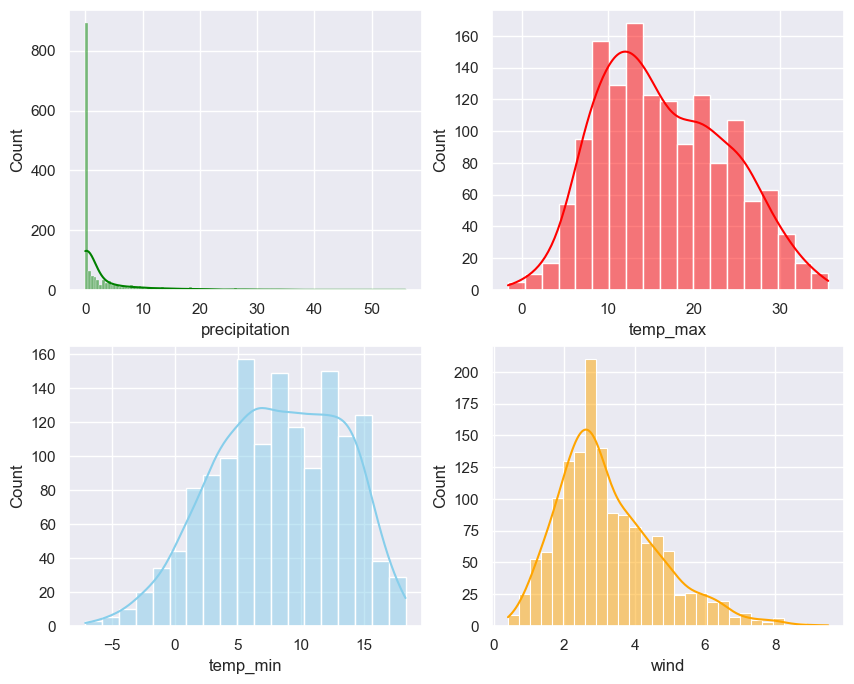

In [48]:
sns.set(style = "darkgrid")

variables = ["precipitation","temp_max","temp_min","wind"]
colors = ["green","red","skyblue","orange"]

fig , axs = plt.subplots(2,2,figsize =(10,8))
for i,var in enumerate(variables):
    sns.histplot(data = df , x=var,kde = True,ax=axs[i//2,i%2],color = colors[i])

C:\Users\hp\AppData\Local\Temp\ipykernel_10720\129708876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation",y="weather",data = df, palette="winter",ax=ax)


<Axes: xlabel='precipitation', ylabel='weather'>

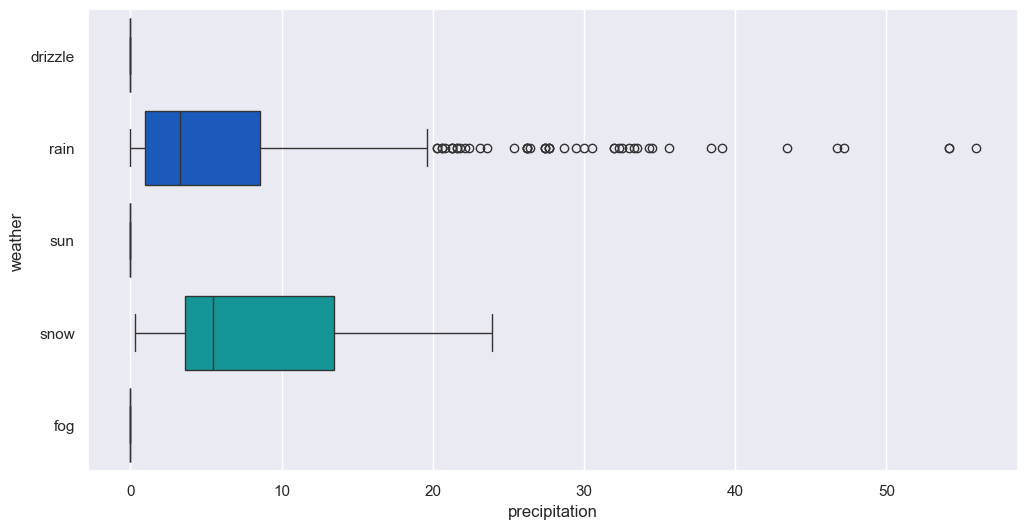

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="precipitation",y="weather",data = df, palette="winter",ax=ax)

From the boxplot between weather and precipitation above, the value of rain has many positive outliers, and both rain and snow are right-skewed/positively skewed.

C:\Users\hp\AppData\Local\Temp\ipykernel_10720\2840979907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max",y="weather",data = df, palette="winter",ax=ax)


<Axes: xlabel='temp_max', ylabel='weather'>

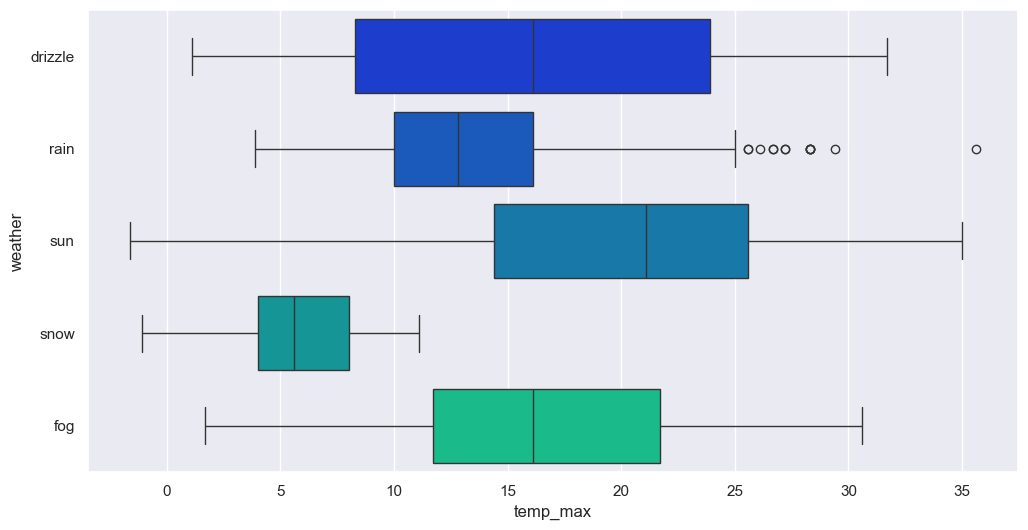

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="temp_max",y="weather",data = df, palette="winter",ax=ax)

observed from the above box plot rain has some positive outliers and there are some right and left offset all weather variable 

C:\Users\hp\AppData\Local\Temp\ipykernel_10720\1851549475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min",y="weather",data = df, palette="winter",ax=ax)


<Axes: xlabel='temp_min', ylabel='weather'>

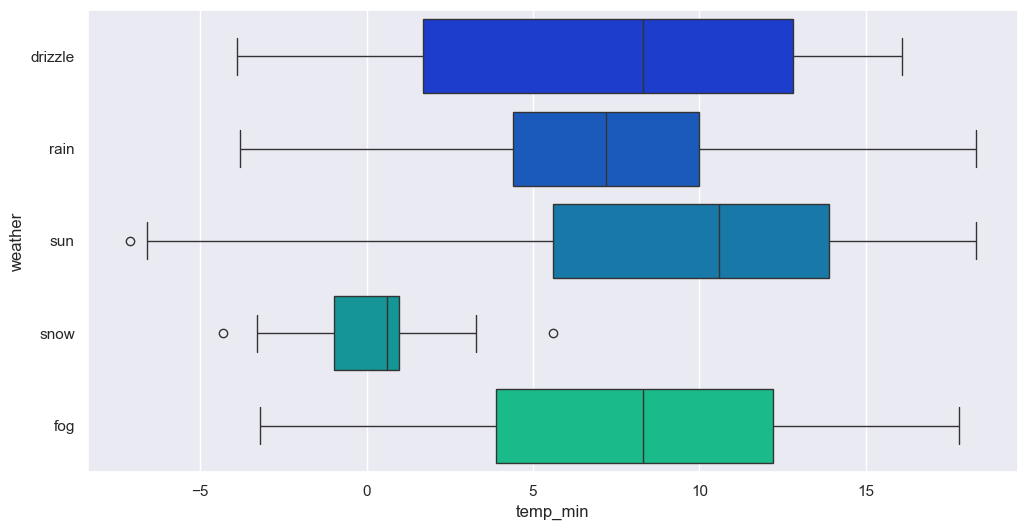

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="temp_min",y="weather",data = df, palette="winter",ax=ax)

observed from the boxplot between weather and temp_min, we see that the weather condition sun has negative outliers and snow has both positive and negative outliers, where snow is skewed to the left.

C:\Users\hp\AppData\Local\Temp\ipykernel_10720\425003240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind",y="weather",data = df, palette="winter",ax=ax)


<Axes: xlabel='wind', ylabel='weather'>

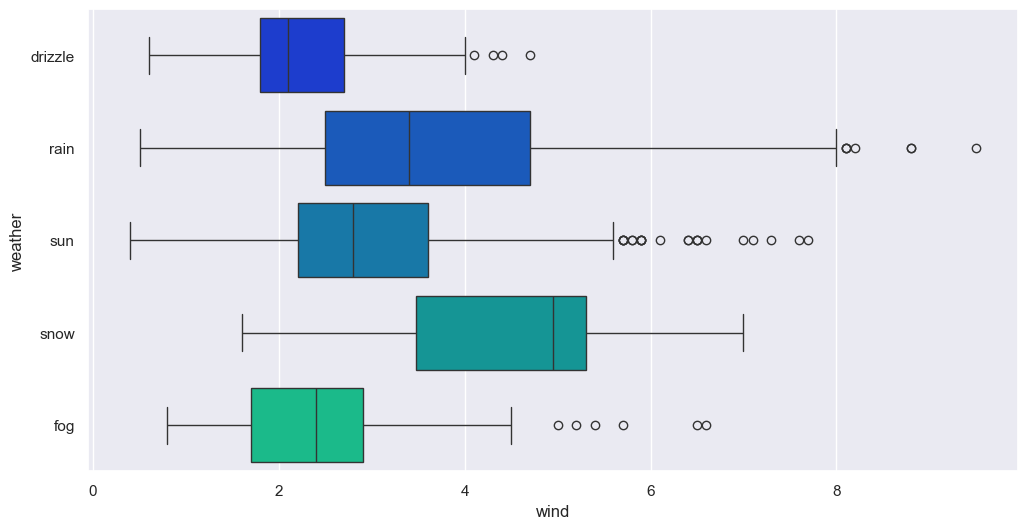

In [55]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="wind",y="weather",data = df, palette="winter",ax=ax)

From the boxplots above, we that each attribute of weather has some positive outliers and also includes both left and right offsets

[Text(0.5, 1.0, 'Scatter plot of Wind vs. Maximum Temperature')]

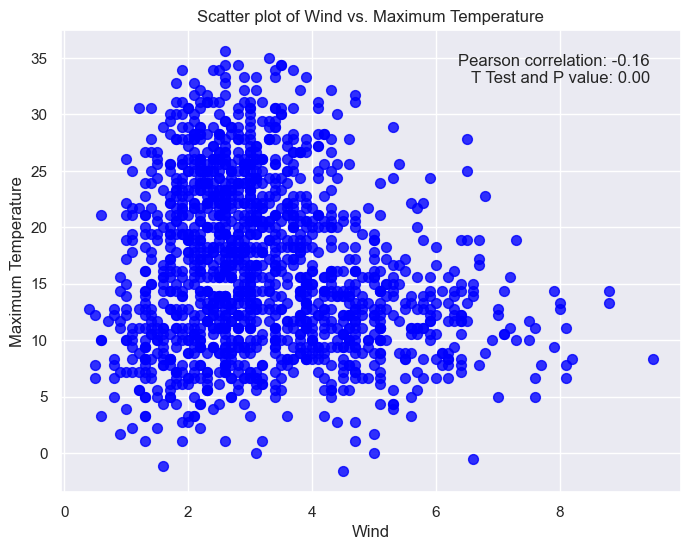

In [57]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=df["wind"], y=df["temp_max"], marker='o', s=50, alpha=0.8, color='blue')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(df["wind"], df["temp_max"])[0, 1], np.mean(np.abs(stats.ttest_ind(df["wind"], df["temp_max"])[1]))

# Display the correlation and p-value on the plot
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Wind', ylabel='Maximum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Wind vs. Maximum Temperature')


* According to the results of t-test and the calculated p-value is zero from above, it proves that the hypothesis H0 in the respective variables is rejected and the above variables are all statistically significant and have an influence on the results. forecast.

* At the same time, we also see that the correlation coefficient between the above pairs of variables is in the range -1 < r < 0, this means that they have a weak correlation with each other or have a negative correlation coefficient and they are not. have a linear relationship with each other. That is, the value of variable x increases, the value of variable y decreases and vice versa, the value of variable y increases, the value of variable x decreases.

[Text(0.5, 1.0, 'Scatter plot of Maximum vs. Minimum Temperature')]

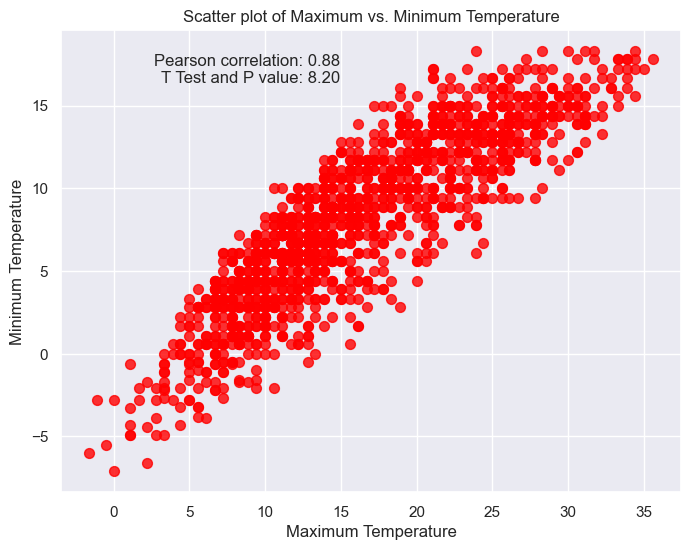

In [59]:

# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=df["temp_max"], y=df["temp_min"], marker='o', s=50, alpha=0.8, color='red')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(df["temp_max"], df["temp_min"])[0, 1], np.mean(np.abs(np.subtract(df["temp_max"], df["temp_min"])))

# Display the correlation and p-value on the plot
ax.text(0.45, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Maximum vs. Minimum Temperature')


Based on the above graph, we can comment that the variable `temp_min` and the variable `temp_max` have a positive relationship with each other and this linear relationship is quite strong with a correlation coefficient of 0.87 close to 1. That is, the value of variable x increases, the value of variable y increases and vice versa, the value of variable y increases, the value of variable x also increases.

# **5.DATA PROCESSING AND CLEANING:**

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()

df['weather_encoded'] =   le.fit_transform(df['weather'])


# Create a dictionary that maps the encoded values to the actual names
weather_names = dict(zip(le.classes_, le.transform(le.classes_)))



C:\Users\hp\AppData\Local\Temp\ipykernel_10720\1272015570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='weather_encoded', data=df, palette='hls')


KeyError: 0

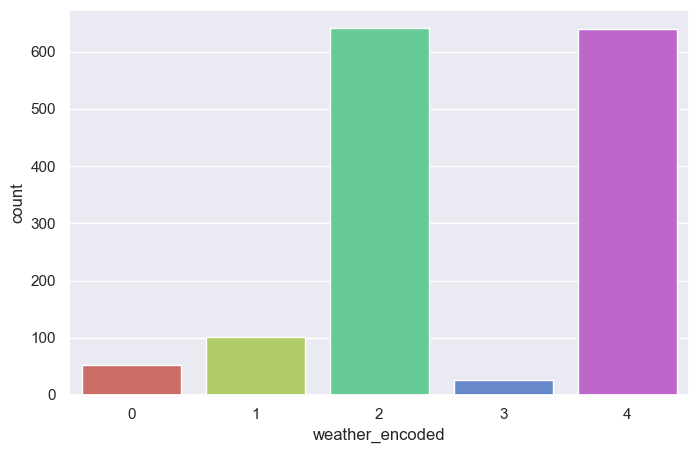

In [64]:
# Plot the count of each unique value in the weather column with actual names on the labels
plt.figure(figsize=(8,5))
ax = sns.countplot(x='weather_encoded', data=df, palette='hls')

# Set x-tick labels to actual weather names
ax.set_xticklabels([weather_names[val] for val in df['weather_encoded'].unique()])

plt.xlabel("Weather")
plt.ylabel("Count")
plt.title("Weather Frequency")
plt.show()

## 5.1. REMOVED OUTLIER POINTS AND INFINITE VALUES

* Since the above dataset contains outliers, we will remove them to make the dataset more uniform.

* We remove the Outlier points by calculating the interquartile range, then remove the values ​​outside the range (Q1-1.5*IQR, Q3+1.5*IQR). Points outside this range are called outliers.

First, we convert the data type in the variable `date` from string to data type `Datetime`. Then remove the day and year attributes in `date`, extract and keep the month attribute because usually the weather often depends on the seasons of the year and the seasons of the year also change by month.

In [92]:
df.date = pd.to_datetime(df.date).dt.month
df.date

0        1
1        1
2        1
3        1
4        1
        ..
1456    12
1457    12
1458    12
1459    12
1460    12
Name: date, Length: 1461, dtype: int32

In [94]:

df = df.rename(columns = {'date':'month'})
df.head()

,month,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,1,0.000000,12.8,5.0,2.167948,drizzle,0
1,1,3.301515,10.6,2.8,2.121320,rain,2
2,1,0.894427,11.7,7.2,1.516575,rain,2
3,1,4.505552,12.2,5.6,2.167948,rain,2
4,1,1.140175,8.9,2.8,2.469818,rain,2


In [96]:
df = df.drop('weather',axis =1)
df.head()

,month,precipitation,temp_max,temp_min,wind,weather_encoded
0,1,0.000000,12.8,5.0,2.167948,0
1,1,3.301515,10.6,2.8,2.121320,2
2,1,0.894427,11.7,7.2,1.516575,2
3,1,4.505552,12.2,5.6,2.167948,2
4,1,1.140175,8.9,2.8,2.469818,2


In [98]:
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Align the indices of df and (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)
df, _ = df.align((Q1 - 1.5 * IQR) | (df > (Q3 + 1.5 * IQR)), axis=1, copy=False)

# Remove outliers using the IQR method
df = df.dropna()



## 5.2. HANDLING DIFFERENT DISTRIBUTIONS

In [101]:
# Take the square root of the "precipitation" column
df["precipitation"] = np.sqrt(df["precipitation"])

# Take the square root of the "wind" column
df["wind"] = np.sqrt(df["wind"])


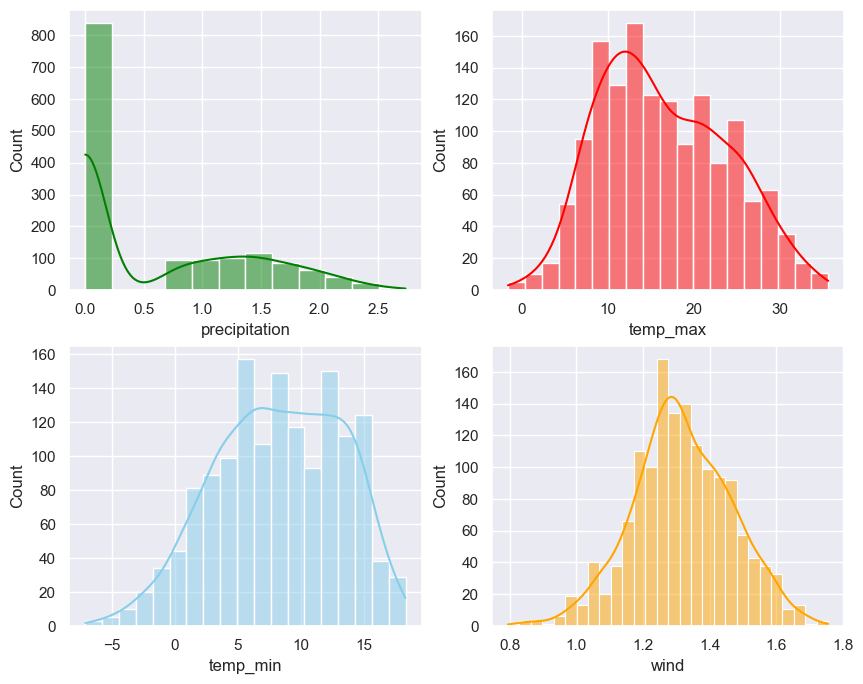

In [103]:
# set the plot style to darkgrid
sns.set(style="darkgrid")

# create a 2x2 subplot grid with a specified size
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# loop through each column and its index in the dataframe
for i, column in enumerate(["precipitation", "temp_max", "temp_min", "wind"]):
    
    # create a histogram plot for the current column, with a kernel density estimate
    # set the current axis to the appropriate subplot in the grid
    # set the color of the histogram based on the index of the current column
    sns.histplot(data=df, x=column, kde=True, ax=axs[i//2, i%2], color=['green', 'red', 'skyblue', 'orange'][i])


In [105]:
df.head()

,month,precipitation,temp_max,temp_min,wind,weather_encoded
0,1,0.000000,12.8,5.0,1.472395,0
1,1,1.817007,10.6,2.8,1.456475,2
2,1,0.945742,11.7,7.2,1.231493,2
3,1,2.122629,12.2,5.6,1.472395,2
4,1,1.067790,8.9,2.8,1.571565,2


## 5.3  Splitting the dataset in training and testing 

In [108]:
x = df.iloc[:,:-1]
y  = df['weather_encoded']

In [110]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather_encoded, Length: 1461, dtype: int32

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

## Model Training

In [114]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [516]:
def evaluate_model_acc(true, predicted):
    print("Accuracy score: " , accuracy_score(true,predicted))

def evaluate_model_conf_matrix(true,predicted):
    print(confusion_matrix(true,predicted))

def evaluate_model_report(true,predicted):
    print(classification_report(true,predicted))

In [518]:
def evaluate_model_acc1(true, predicted):
    return accuracy_score(true,predicted)

In [545]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "SVC":SVC(),
    "GradienBoostingClassifier":GradientBoostingClassifier()
}
model_list = []
acc_list_test=[]
acc_list_train=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_acc1 = evaluate_model_acc1(y_train, y_train_pred)

    model_test_acc1 = evaluate_model_acc1(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    evaluate_model_acc(y_train, y_train_pred)
   


    print('----------------------------------')
    
    print('Model performance for Test set')
    evaluate_model_acc(y_test, y_test_pred)
   
    acc_list_train.append(model_train_acc1)
    acc_list_test.append(model_test_acc1)
    
    print('='*35)
    print('\n')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
Accuracy score:  0.8462709284627092
----------------------------------
Model performance for Test set
Accuracy score:  0.8843537414965986


K-Neighbors Classifier
Model performance for Training set
Accuracy score:  0.8401826484018264
----------------------------------
Model performance for Test set
Accuracy score:  0.8027210884353742


Decision Tree
Model performance for Training set
Accuracy score:  1.0
----------------------------------
Model performance for Test set
Accuracy score:  0.8163265306122449


Random Forest Classifier
Model performance for Training set
Accuracy score:  1.0
----------------------------------
Model performance for Test set
Accuracy score:  0.8775510204081632


XGBClassifier
Model performance for Training set
Accuracy score:  1.0
----------------------------------
Model performance for Test set
Accuracy score:  0.8639455782312925


CatBoosting Classifier
Model performance for Training set
Accuracy score: 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
Accuracy score:  0.7983257229832572
----------------------------------
Model performance for Test set
Accuracy score:  0.8299319727891157


SVC
Model performance for Training set
Accuracy score:  0.817351598173516
----------------------------------
Model performance for Test set
Accuracy score:  0.8367346938775511


GradienBoostingClassifier
Model performance for Training set
Accuracy score:  0.91324200913242
----------------------------------
Model performance for Test set
Accuracy score:  0.8775510204081632




In [548]:
pd.DataFrame(list(zip(model_list, acc_list_train,acc_list_test)), columns=['Model Name', 'Accuracy_Score_train','Accuracy_score_test']).sort_values(by=["Accuracy_score_test"],ascending=False)

,Model Name,Accuracy_Score_train,Accuracy_score_test
0,Logistic Regression,0.846271,0.884354
3,Random Forest Classifier,1.000000,0.877551
8,GradienBoostingClassifier,0.913242,0.877551
5,CatBoosting Classifier,0.973364,0.870748
4,XGBClassifier,1.000000,0.863946
7,SVC,0.817352,0.836735
6,AdaBoost Classifier,0.798326,0.829932
2,Decision Tree,1.000000,0.816327
1,K-Neighbors Classifier,0.840183,0.802721


In [522]:
for i in range(len(list(models))):

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Test set')
    evaluate_model_conf_matrix(y_test, y_test_pred)
    
    
   

Logistic Regression
Model performance for Test set
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 75  1  3]
 [ 0  0  2  4  0]
 [ 0  2  0  0 50]]
K-Neighbors Classifier
Model performance for Test set
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 75  1  3]
 [ 0  0  2  4  0]
 [ 0  2  0  0 50]]
Decision Tree
Model performance for Test set
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 75  1  3]
 [ 0  0  2  4  0]
 [ 0  2  0  0 50]]
Random Forest Classifier
Model performance for Test set
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 75  1  3]
 [ 0  0  2  4  0]
 [ 0  2  0  0 50]]
XGBClassifier
Model performance for Test set
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 75  1  3]
 [ 0  0  2  4  0]
 [ 0  2  0  0 50]]
CatBoosting Classifier
Model performance for Test set
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 75  1  3]
 [ 0  0  2  4  0]
 [ 0  2  0  0 50]]
AdaBoost Classifier
Model performance for Test set
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 75  1  3]
 [ 0  0  2  4  0]
 [ 0  2  0  0 50]]
SVC
Mod

In [523]:
for i in range(len(list(models))):

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Test set')
    evaluate_model_report(y_test, y_test_pred)
    
    
   

Logistic Regression
Model performance for Test set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.97      0.95      0.96        79
           3       0.80      0.67      0.73         6
           4       0.79      0.96      0.87        52

    accuracy                           0.88       147
   macro avg       0.51      0.52      0.51       147
weighted avg       0.84      0.88      0.85       147

K-Neighbors Classifier
Model performance for Test set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.97      0.95      0.96        79
           3       0.80      0.67      0.73         6
           4       0.79      0.96      0.87        52

    accuracy                           0.88       147
   macro avg       0.51   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packag

In [524]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "SVC":SVC(),
    "GradienBoostingClassifier":GradientBoostingClassifier()
}
params = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
    },
    "Random Forest Classifier": {
        'n_estimators': [10, 50, 100, 200, 500],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False],
    },
    "GradienBoostingClassifier": {
        'loss': ['log_loss', 'exponential'],
        'learning_rate': [0.1, 0.05, 0.01, 0.001],
        'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [3, 4, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
    },
    "Logistic Regression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200, 300, 500],
    },
    "SVC": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4, 5],  # Only relevant for 'poly' kernel
    },
    "K-Neighbors Classifier": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
    },
    "XGBClassifier": {
        'learning_rate': [0.1, 0.05, 0.01, 0.001],
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [3, 4, 5, 10, None],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.01, 0.1, 1, 10],
        'reg_lambda': [0, 0.01, 0.1, 1, 10],
    },
    "CatBoosting Classifier": {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [50, 100, 200, 500],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'border_count': [32, 64, 128],
    },
    "AdaBoost Classifier": {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.1, 0.05, 0.01, 0.001],
        'algorithm': ['SAMME', 'SAMME.R'],
    }
    
}



In [527]:

def evaluate_models(X_train, y_train, X_test, y_test, models, param):
    report = {}

    for model_name, model in models.items():
        if model_name not in param:
            print(f"Skipping {model_name} (no hyperparameters in params)")
            continue

        gs = GridSearchCV(model, param[model_name], cv=3,n_jobs=-1)
        gs.fit(X_train, y_train)

        best_model = gs.best_estimator_
        best_model.fit(X_train, y_train)

        y_test_pred = best_model.predict(X_test)
        test_model_score = accuracy_score(y_test, y_test_pred)

        report[model_name] = test_model_score

    return report



In [529]:
# Run model evaluation
model_report = evaluate_models(x_train, y_train, x_test, y_test, models, params)

# Get best model
best_model_name = max(model_report, key=model_report.get)
best_model_score = model_report[best_model_name]
best_model = models[best_model_name]

print("Best Model:", best_model_name)
print("Accuracy:", best_model_score)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
300 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

KeyboardInterrupt: 

In [566]:
from sklearn.model_selection import RandomizedSearchCV

def evaluate_models1(X_train, y_train, X_test, y_test, models, param, n_iter=6):
    report = {}

    for model_name, model in models.items():
        if model_name not in param:
            print(f"Skipping {model_name} (no hyperparameters in params)")
            continue

        rs = RandomizedSearchCV(model, param[model_name], n_iter=n_iter, cv=3, n_jobs=-1, random_state=42)
        rs.fit(X_train, y_train)
        print(rs.best_estimator_)
        best_model = rs.best_estimator_
        best_model.fit(X_train, y_train)

        y_test_pred = best_model.predict(X_test)
        test_model_score = accuracy_score(y_test, y_test_pred)

        report[model_name] = test_model_score

    return report


In [568]:
# Run model evaluation
model_report = evaluate_models1(x_train, y_train, x_test, y_test, models, params)

# Get best model
best_model_name = max(model_report, key=model_report.get)
best_model_score = model_report[best_model_name]
best_model = models[best_model_name]

print("Best Model:", best_model_name)
print("Accuracy:", best_model_score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _che

LogisticRegression(C=10, max_iter=300, penalty=None, solver='saga')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
DecisionTreeClassifier(max_depth=10, min_samples_leaf=4)
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_esti

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.001, n_estimators=100)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


SVC(C=1, kernel='linear')


ValueError: 
All the 6 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 673, in fit
    self._loss = self._get_loss(sample_weight=sample_weight)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 1537, in _get_loss
    raise ValueError(
ValueError: loss='exponential' is only suitable for a binary classification problem, you have n_classes=5. Please use loss='log_loss' instead.


Here, we will use a typical model from the number of models built above to test the results. We will choose a model built with Logistic Regression with variable `month` that stores month information extracted from `date` variable, with parameter max_depth = 4. This model has an accuracy of 0.88.

In [116]:
lr = LogisticRegression(C=10, max_iter=300, penalty=None, solver='saga')

In [118]:
lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, max_iter=300, penalty=None, solver='saga')

In [120]:
pred = lr.predict(x_test)

In [122]:
accuracy_score(y_test,pred)

0.8843537414965986

In [130]:
input=[[3,1.377449,9.4,5.0,1.293569]]
ot = lr.predict(input)
print("The weather is:",end=" ")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is: Rain


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [128]:
x_test

,month,precipitation,temp_max,temp_min,wind
68,3,1.377449,9.4,5.0,1.293569
71,3,2.095991,8.3,0.6,1.577967
1003,9,0.000000,19.4,12.2,1.269823
1365,9,0.000000,17.8,7.2,1.396194
335,12,1.422971,13.3,8.3,1.531407
...,...,...,...,...,...
944,8,0.840896,29.4,15.6,1.141858
837,4,2.073924,11.7,7.2,1.472395
307,11,0.840896,15.6,11.1,1.377449
17,1,2.109436,0.0,-2.8,1.495349


In [132]:
y_test


68      2
71      3
1003    4
1365    4
335     2
       ..
944     2
837     2
307     2
17      3
204     2
Name: weather_encoded, Length: 147, dtype: int32